In [1]:
# Install if needed: pip install scikit-learn pandas seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
# Load iris dataset from sklearn
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



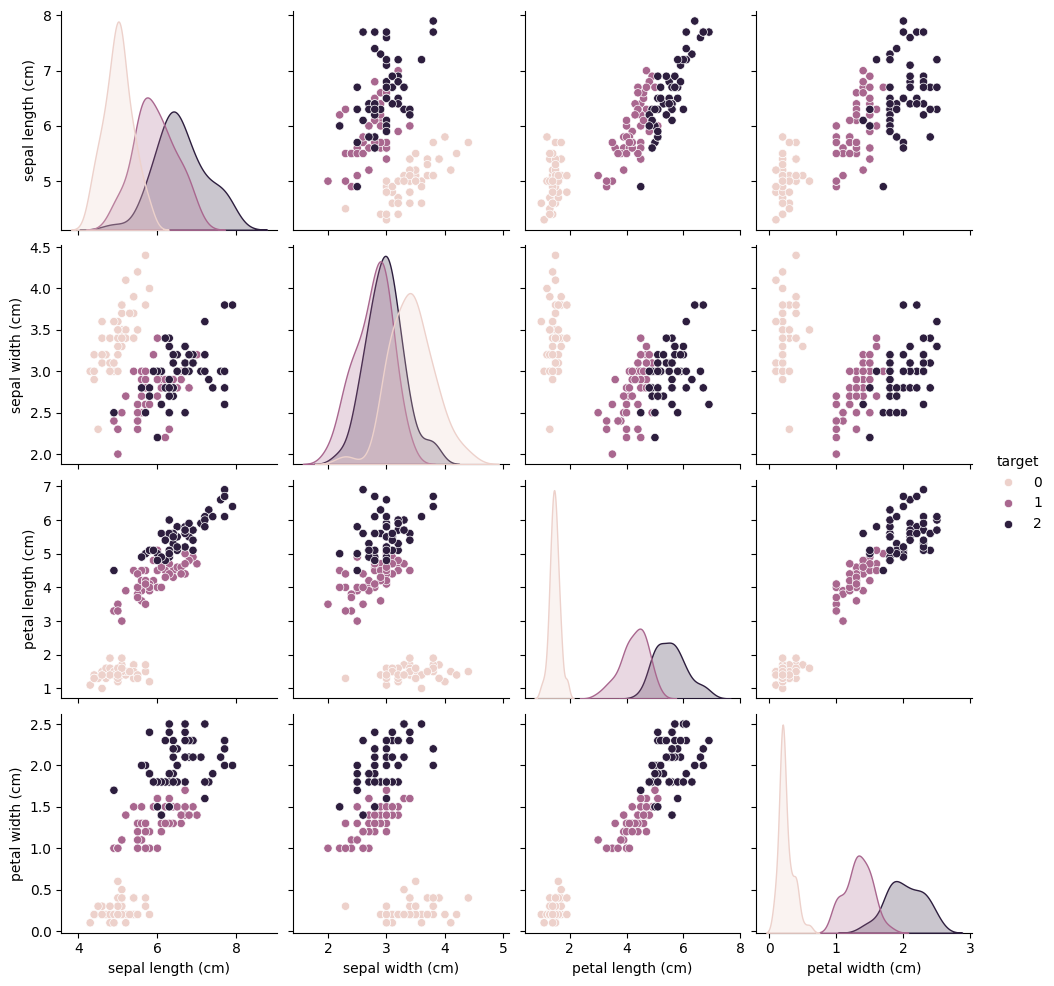

In [10]:
# Simple visualization: Pairplot
sns.pairplot(df, hue="target", diag_kind="kde")
plt.savefig("pairplot.png")  # Save the plot as a file
plt.show()


In [ ]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select useful features
df = titanic[["survived", "pclass", "sex", "age", "fare"]]

# Handle missing values
df["age"].fillna(df["age"].median(), inplace=True)

# Convert categorical to numeric
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

# Features & Target
X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]


/var/folders/zz/9fw1lvb17rnfvxqc0n90c8qc0000gn/T/ipykernel_1282/3225139303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/var/folders/zz/9fw1lvb17rnfvxqc0n90c8qc0000gn/T/ipykernel_1282/3225139303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].median(), inp

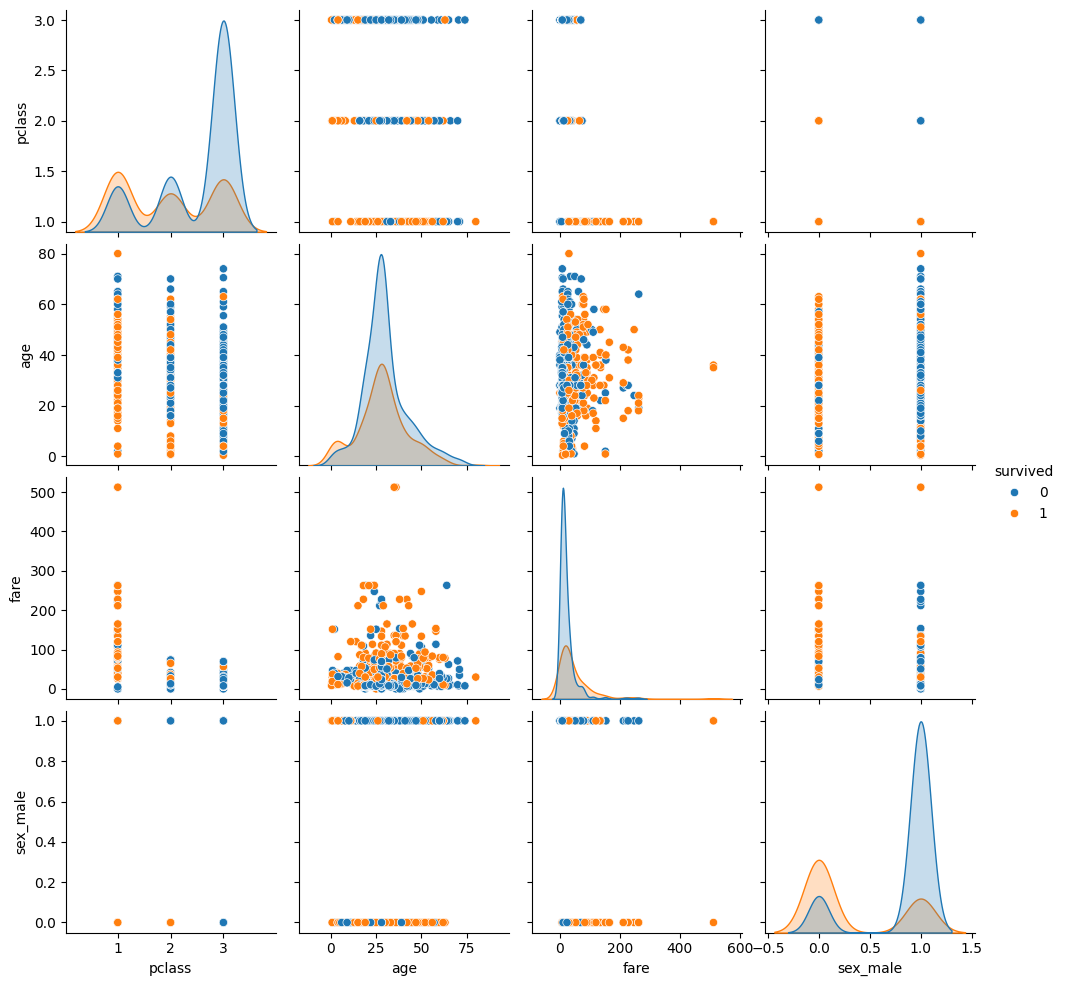

In [14]:
sns.pairplot(df, hue="survived", diag_kind="kde")
plt.savefig("titanic_pairplot.png")  # Save the plot as a file
plt.show()
